In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# Set path to your dataset
train_dir = r'/kaggle/input/plantvillage/PlantVillage/train'
val_dir= r'/kaggle/input/plantvillage/PlantVillage/val'
# https://www.kaggle.com/datasets/mohitsingh1804/plantvillage
img_size = 128
batch_size = 32


2025-05-07 19:12:45.061762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746645165.268603      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746645165.324189      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Check GPU availability
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
for device in physical_devices:
    print(device)

Num GPUs Available:  2
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


In [3]:
# Enable memory growth to prevent GPU memory allocation issues
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
# Load and preprocess the data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

Found 43444 files belonging to 38 classes.
Using 34756 files for training.


I0000 00:00:1746645213.791607      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746645213.792474      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)


class_names = train_ds.class_names
print("Class names:", class_names)

# Improve performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 10861 files belonging to 38 classes.
Using 2172 files for validation.
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___

In [6]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)),  # Normalize
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output for multi-class
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


I0000 00:00:1746645332.205923     101 service.cc:148] XLA service 0x7e63e0004ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746645332.206771     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746645332.206794     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746645332.495389     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


   8/1087 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.0476 - loss: 3.5930      

I0000 00:00:1746645335.426517     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.5355 - loss: 1.6949 - val_accuracy: 0.8232 - val_loss: 0.5810
Epoch 2/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8634 - loss: 0.4368 - val_accuracy: 0.8743 - val_loss: 0.3890
Epoch 3/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9194 - loss: 0.2529 - val_accuracy: 0.9038 - val_loss: 0.3078
Epoch 4/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9530 - loss: 0.1450 - val_accuracy: 0.8637 - val_loss: 0.4466
Epoch 5/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9649 - loss: 0.1086 - val_accuracy: 0.9001 - val_loss: 0.3702
Epoch 6/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9751 - loss: 0.0759 - val_accuracy: 0.9199 - val_loss: 0.3021
Epoch 7/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9779 - loss: 0.0681 - val_accuracy: 0.8513 - val_loss: 0.6183
Epoch 8/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9785 - loss: 0.06

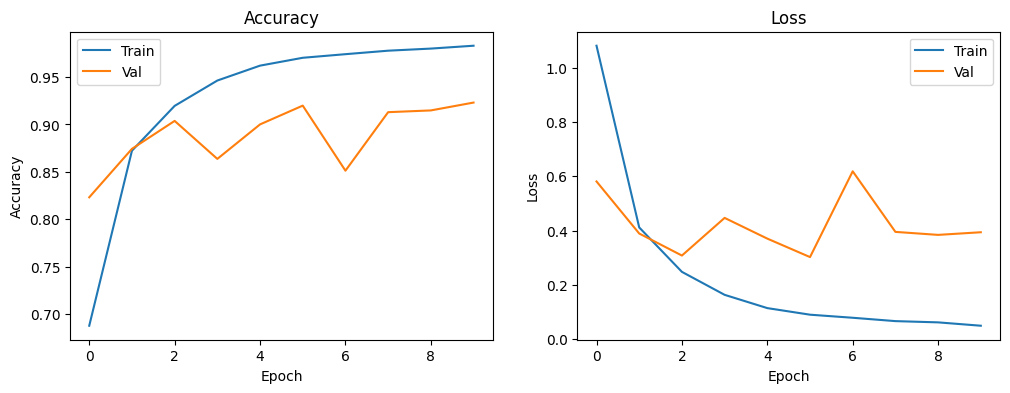

In [8]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


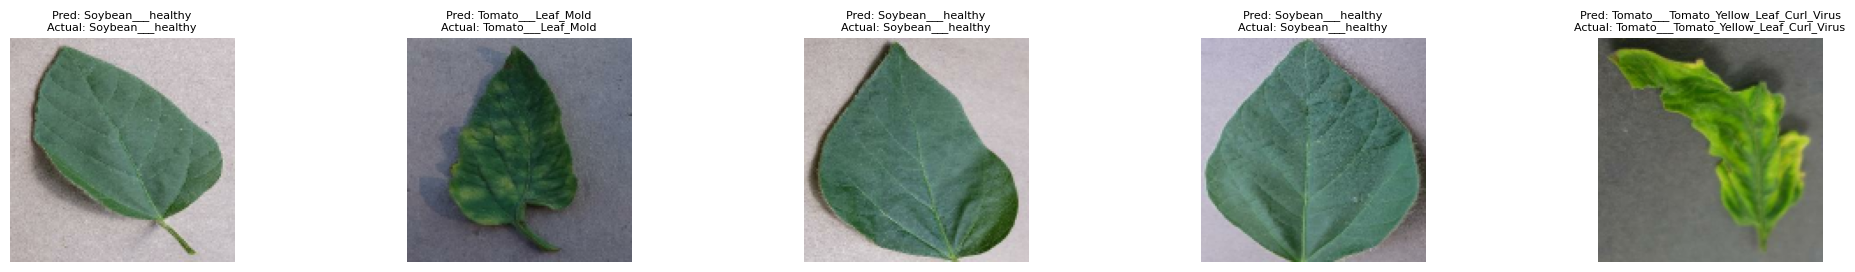

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Get a batch of validation images
for images, labels in val_ds.take(1):  # Take the first batch
    predictions = model.predict(images[:5])  # Predict on first 5 images
    predicted_classes = tf.argmax(predictions, axis=1)

    plt.figure(figsize=(20, 10))
    for i in range(5):
        plt.subplot(4, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[predicted_classes[i]]}\nActual: {class_names[labels[i]]}", fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [11]:
# ### 🧠 Full Theoretical Explanation of Image Classification Code Using `image_dataset_from_directory` and CNN

# This code trains a **Convolutional Neural Network (CNN)** to classify images from a directory using the `tf.keras` API. Below is a breakdown of the theoretical concepts behind each part of the code.

# ---

# ### 📂 1. **Dataset Loading from Directory**

# ```python
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     val_dir,
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     image_size=(img_size, img_size),
#     batch_size=batch_size
# )
# ```

# * **image\_dataset\_from\_directory**: Loads images organized in folders, where each folder name corresponds to a class label.
# * **validation\_split & subset**: Splits data into training and validation sets.
# * **image\_size**: Resizes all images to a fixed resolution to ensure uniform input.
# * **batch\_size**: Defines how many images are processed at once during training.

# 📌 This abstracts away manual image loading, labeling, and resizing, streamlining pipeline creation.

# ---

# ### 🔤 2. **Class Name Extraction**

# ```python
# class_names = train_ds.class_names
# ```

# * Extracts the names of all classes (i.e., subfolder names).
# * Used for mapping output predictions to human-readable labels.

# ---

# ### ⚡ 3. **Dataset Pipeline Optimization**

# ```python
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# ```

# * **`cache()`**: Caches the dataset in memory after first epoch to avoid reloading from disk.
# * **`shuffle(1000)`**: Randomizes sample order to avoid learning biases from directory structure.
# * **`prefetch(AUTOTUNE)`**: Allows data loading and model execution to overlap, reducing I/O bottlenecks.

# 📌 This improves GPU/CPU utilization and speeds up training.

# ---

# ### 🏗️ 4. **Model Architecture**

# ```python
# model = models.Sequential([
#     layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)),
# ```

# * **Rescaling Layer**: Normalizes pixel values from `[0, 255]` to `[0.0, 1.0]`.
# * Helps speed up convergence by keeping inputs numerically stable.

# ---

# ```python
#     layers.Conv2D(32, 3, activation='relu'),
#     layers.MaxPooling2D(),
# ```

# * **Conv2D (32 filters, 3×3 kernel)**: Extracts local patterns (edges, textures).
# * **ReLU activation**: Introduces non-linearity.
# * **MaxPooling2D**: Downsamples feature maps, reducing spatial size and computation.

# ---

# ```python
#     layers.Conv2D(64, 3, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(128, 3, activation='relu'),
#     layers.MaxPooling2D(),
# ```

# * Adds **deeper layers** to capture more abstract patterns.
# * More filters allow learning of more features (lines, shapes, parts of objects).

# 📌 Stacking more convolutional blocks deepens the feature hierarchy.

# ---

# ```python
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
# ```

# * **Flatten**: Converts 3D feature maps into a 1D vector.
# * **Dense(128)**: Fully connected layer that learns high-level decision features.
# * **ReLU**: Maintains non-linearity in feature space.

# ---

# ```python
#     layers.Dense(len(class_names), activation='softmax')
# ])
# ```

# * **Output Layer**: Size = number of classes.
# * **Softmax**: Converts raw logits to class probabilities. Ensures the outputs sum to 1.

# 📌 Suitable for multi-class classification.

# ---

# ### ⚙️ 5. **Model Compilation**

# ```python
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# ```

# * **Adam**: Adaptive optimizer that adjusts learning rates per parameter using momentum and RMS.
# * **sparse\_categorical\_crossentropy**:

#   * Used when target labels are integer-encoded (e.g., `[0, 1, 2, ..., n-1]`).
#   * Computes the log loss between true class and predicted probability distribution.
# * **Accuracy**: Measures the proportion of correct predictions.

# ---

# ### 🧪 6. **Model Training** (Missing in your snippet but implied)

# ```python
# model.fit(train_ds, validation_data=val_ds, epochs=...)
# ```

# * **fit()**: Starts the training loop.
# * Uses backpropagation to minimize loss.
# * Evaluates performance using validation set after each epoch.

# ---

# Let me know if you'd like a visual diagram of this model architecture or sample predictions.
